# Criando modelo de Machine Learning

## Carregamento dos pacotes iniciais

Apesar de ter exportado um arquivo CSV, vou consultar diretamente o banco de dados para melhorar meu conhecimento

In [2]:
#!pip install mysql-connector-python
#!pip install pyyaml

In [3]:
import pandas as pd
import numpy as np
from mysql.connector import connect, Error
import yaml

## Definição e conexão

Vou usar a leitura de um arquivo yaml apesar de não ser boa prática armazenar senhas em arquivos estáticos

In [5]:
with open('login.yml', 'r') as l:
    acesso_yml=yaml.safe_load(l)

conn = connect(**acesso_yml)

In [6]:
base_estudo = pd.read_sql(sql="select * from analise_risco.base_emprestimo_analise", con = conn)
conn.close()
base_estudo.head()

,id_solicitante,id_emprestimo,id_historico,idade_solicitante,salario_solicitante,situacao_propriedade,tempo_trabalhado,motivo,pontuacao,valor_solicitado,taxa_juros,percentual_renda,flag_inadimplencia,anos_primeira_solicitacao,flag_inadimplencia_hist
0,02x9biGh-3gTR,k9lhNtMp-72zH,6EM4uoS2-maX2,23.0,68000.0,Alugada,1.0,Empreendimento,E,14400.0,17.99,0.21,1.0,2,0
1,05AU2u3q-jNEJ,2jgsNDsK-S45I,2nr9qAH9-x2vh,25.0,45000.0,Alugada,0.0,Empreendimento,C,10000.0,12.98,0.22,0.0,2,1
2,05o7RxO7-9LhQ,G7ebJZJb-6GDu,1zlTwsfS-0pan,23.0,65000.0,Alugada,2.0,Pagamento de débitos,B,3600.0,11.49,0.06,0.0,2,0
3,08rX5Qdc-ufb0,0sFrQD5Y-agj2,6rafzTfN-8awI,23.0,45312.0,Alugada,3.0,Educativo,A,13500.0,7.88,0.30,0.0,3,0
4,095kmLry-GPTX,eIoa76FA-d0FH,3ph8dE3U-L5I7,22.0,64000.0,Alugada,6.0,Educativo,A,7000.0,5.79,0.11,0.0,3,0


In [9]:
print('A base de estudo possui {} registros e {} colunas.'.format(base_estudo.shape[0] ,base_estudo.shape[1]))

A base de estudo possui 34485 registros e 15 colunas.


In [10]:
base_estudo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34485 entries, 0 to 34484
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_solicitante             34485 non-null  object 
 1   id_emprestimo              34485 non-null  object 
 2   id_historico               34485 non-null  object 
 3   idade_solicitante          34165 non-null  float64
 4   salario_solicitante        34150 non-null  float64
 5   situacao_propriedade       34485 non-null  object 
 6   tempo_trabalhado           33231 non-null  float64
 7   motivo                     34485 non-null  object 
 8   pontuacao                  34485 non-null  object 
 9   valor_solicitado           34154 non-null  float64
 10  taxa_juros                 30859 non-null  float64
 11  percentual_renda           34170 non-null  float64
 12  flag_inadimplencia         34142 non-null  float64
 13  anos_primeira_solicitacao  34485 non-null  int

É possível identificar que temos variáveis com dados nulos

In [11]:
base_estudo.describe()

,idade_solicitante,salario_solicitante,tempo_trabalhado,valor_solicitado,taxa_juros,percentual_renda,flag_inadimplencia,anos_primeira_solicitacao
count,34165.000000,3.415000e+04,33231.000000,34154.000000,30859.000000,34170.000000,34142.000000,34485.000000
mean,27.730806,6.602318e+04,4.788089,9590.560403,11.012929,0.170229,0.218177,5.808583
std,6.346158,6.141127e+04,4.138156,6321.217451,3.240293,0.106791,0.413014,4.063816
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.849600e+04,2.000000,5000.000000,7.900000,0.090000,0.000000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,0.000000,4.000000
75%,30.000000,7.910000e+04,7.000000,12200.000000,13.470000,0.230000,0.000000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,1.000000,30.000000


In [12]:
base_estudo.isnull().sum()

id_solicitante                  0
id_emprestimo                   0
id_historico                    0
idade_solicitante             320
salario_solicitante           335
situacao_propriedade            0
tempo_trabalhado             1254
motivo                          0
pontuacao                       0
valor_solicitado              331
taxa_juros                   3626
percentual_renda              315
flag_inadimplencia            343
anos_primeira_solicitacao       0
flag_inadimplencia_hist         0
dtype: int64

In [13]:
base_estudo.id_solicitante.value_counts()

oScmHoAX-q5al    1
hKuP3Hbo-7lLH    1
Q7Il6hv1-xk0j    1
5jDP00sy-DPwY    1
z0dWKrxi-8KzA    1
                ..
o0TtX2wL-LRpA    1
BJbrUv7U-xluj    1
eA9W3YuH-fDCP    1
ySfru1bt-tP1r    1
GCTL50TW-UdK0    1
Name: id_solicitante, Length: 34485, dtype: int64

## Tratamento de dados nulos e análise de outliers

In [14]:
import seaborn as sns

Vou deixar a `base_estudo` como dados brutos e farei todas as limpezas e análises em cima da `base_tratada`

In [15]:
base_tratada = base_estudo.set_index('id_solicitante').drop(columns=['id_emprestimo', 'id_historico'])

In [16]:
base_tratada.columns

Index(['idade_solicitante', 'salario_solicitante', 'situacao_propriedade',
       'tempo_trabalhado', 'motivo', 'pontuacao', 'valor_solicitado',
       'taxa_juros', 'percentual_renda', 'flag_inadimplencia',
       'anos_primeira_solicitacao', 'flag_inadimplencia_hist'],
      dtype='object')

### Idade solicitante

De acordo com o dicionário de dados, este é o campo com a idade (em anos) do solicitante de empréstimo

In [17]:
base_tratada.idade_solicitante.isnull().sum()

320

In [18]:
base_tratada.idade_solicitante.describe()

count    34165.000000
mean        27.730806
std          6.346158
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: idade_solicitante, dtype: float64

<AxesSubplot:ylabel='idade_solicitante'>

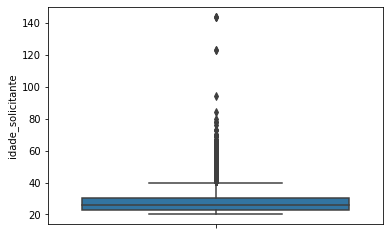

In [19]:
sns.boxplot(data=base_tratada, y='idade_solicitante')

Decido então estabelecer o limite de idade em 80. Acima disso retirarei deste estudo.

In [20]:
base_tratada.query('idade_solicitante.isnull()', engine='python')

,idade_solicitante,salario_solicitante,situacao_propriedade,tempo_trabalhado,motivo,pontuacao,valor_solicitado,taxa_juros,percentual_renda,flag_inadimplencia,anos_primeira_solicitacao,flag_inadimplencia_hist
id_solicitante,,,,,,,,,,,,
0bdO8Dve-7WyH,NaN,32500.0,Outros,6.0,Médico,C,10000.0,NaN,0.06,0.0,5,0
DjTKLr5h-klwH,NaN,72000.0,Alugada,6.0,Médico,A,22000.0,14.09,0.34,0.0,6,
ENIc349j-pnjb,NaN,50000.0,Própria,6.0,Educativo,B,2000.0,7.29,0.08,0.0,6,
Ie9DsFea-UNQD,NaN,88000.0,Alugada,1.0,Pagamento de débitos,B,2000.0,13.48,0.10,0.0,6,
na6NLszG-JXnp,NaN,NaN,Hipotecada,11.0,Empreendimento,A,8800.0,7.51,0.15,0.0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
qxctb80T-v1LW,NaN,NaN,Hipotecada,4.0,Pagamento de débitos,A,3000.0,11.49,0.10,0.0,3,0
siZXIBa5-x19X,NaN,21600.0,Alugada,NaN,Empreendimento,C,3500.0,15.58,0.10,NaN,6,0
swLnXwfd-jGjF,NaN,265000.0,Hipotecada,2.0,Outros,B,3000.0,10.99,0.23,1.0,6,0


Para as idades não informadas, em um primeiro momento eu penso em definir como 20 (que é o mínimo desta base) e acrescentar o tempo trabalhado e assim formar uma idade. Para não ter problema com o modelo, irei separar estes clientes e depois testá-lo no modelo utilizando esta premissa de idade. Farei o mesmo para as idades dispares.

In [21]:
base_teste_idade = base_tratada.query('idade_solicitante.isnull() or idade_solicitante >= 80', engine='python')
base_tratada.drop(base_teste_idade.index, inplace=True)

### Salário do solicitante

In [22]:
base_tratada.salario_solicitante.describe().apply("{0:.1f}".format)

count      33858.0
mean       65827.3
std        52410.0
min         4000.0
25%        38400.0
50%        55000.0
75%        79050.0
max      2039784.0
Name: salario_solicitante, dtype: object

<AxesSubplot:ylabel='salario_solicitante'>

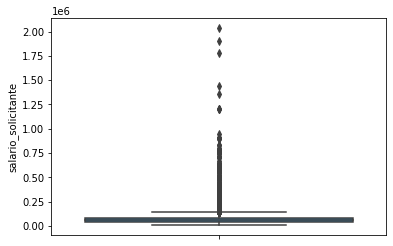

In [23]:
sns.boxplot(data=base_tratada, y='salario_solicitante')

A princípio não irei remover o outlier de salário, verei a relação com as outras variáveis para decidir. Já para os salários não informados, irei utilizar a coluna `percentual_renda`. De acordo com o dicionário de dados esta coluna representa a _renda percentual entre o valor total do empréstimo e o salário anual_

In [24]:
ix_salario_nulo = base_tratada.salario_solicitante.isnull()

In [27]:
base_tratada.loc[ix_salario_nulo, 'salario_solicitante'] = base_tratada.loc[ix_salario_nulo, 'valor_solicitado'] / base_tratada.loc[ix_salario_nulo, 'percentual_renda']

In [28]:
base_tratada.loc[ix_salario_nulo].head()

,idade_solicitante,salario_solicitante,situacao_propriedade,tempo_trabalhado,motivo,pontuacao,valor_solicitado,taxa_juros,percentual_renda,flag_inadimplencia,anos_primeira_solicitacao,flag_inadimplencia_hist
id_solicitante,,,,,,,,,,,,
1DL4zwri-pb2T,27.0,95238.095238,Hipotecada,3.0,Empreendimento,B,20000.0,10.62,0.21,0.0,4,0
1yjr3wLG-y3U3,24.0,NaN,Hipotecada,5.0,Médico,D,NaN,17.27,0.01,1.0,2,0
6gvDE8YA-f4nO,25.0,50000.000000,Alugada,8.0,Pagamento de débitos,C,2500.0,9.62,0.05,0.0,12,
9jhA1L70-z3l0,22.0,63157.894737,Hipotecada,6.0,Outros,A,12000.0,10.25,0.19,0.0,12,0
9qABlZj8-noC5,35.0,42352.941176,Hipotecada,0.0,Outros,B,7200.0,10.59,0.17,0.0,3,0


Os que não foram possível definir o salário também irei separar em uma base para possíveis testes no modelo

In [29]:
ix_salario_nulo = base_tratada.loc[ix_salario_nulo].index
base_teste_salario = base_tratada.loc[ix_salario_nulo]
base_tratada.drop(ix_salario_nulo, inplace=True)

### Situação Propriedade

De acordo com o dicionário de dados, é situação da propriedade que o solicitante possui. Como esta variável não possui dados nulos e já foi traduzida na origem, irei seguir para a próxima variável

In [32]:
base_tratada.situacao_propriedade.value_counts()

Alugada       16955
Hipotecada    13846
Própria        2674
Outros          383
Name: situacao_propriedade, dtype: int64

### Tempo Trabalhado

O tempo de trabalho, em anos, que o solicitante possui

In [42]:
base_tratada.tempo_trabalhado.describe()

count    32677.000000
mean         4.786792
std          4.140237
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: tempo_trabalhado, dtype: float64

<AxesSubplot:ylabel='tempo_trabalhado'>

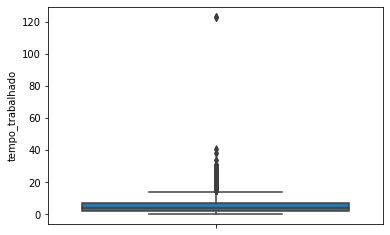

In [43]:
sns.boxplot(data=base_tratada, y='tempo_trabalhado')

Temos pelo menos duas situações que necessitam de correção:
1. Tempo de trabalho maior ou igual ao tempo de vida
1. Tempo de trabalho nulo

In [50]:
ix_tempo_invalido = base_tratada.query('tempo_trabalhado >= idade_solicitante or tempo_trabalhado.isnull()', engine='python').index

<AxesSubplot:ylabel='tempo_trabalhado'>

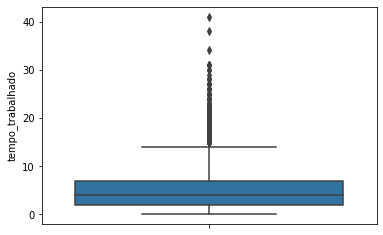

In [51]:
sns.boxplot(data=base_tratada.drop(index=ix_tempo_invalido), y='tempo_trabalhado')

In [52]:
base_teste_tempo_trabalhado = base_tratada.loc[ix_tempo_invalido]
base_tratada.drop(index=ix_tempo_invalido, inplace=True)

### Motivo

Motivo do empréstimo

In [54]:
base_tratada.motivo.value_counts()

Educativo               6442
Médico                  6040
Empreendimento          5682
Pessoal                 5504
Pagamento de débitos    5186
Melhora do lar          3605
Outros                   216
Name: motivo, dtype: int64

### Pontuação

É a pontuação de empréstimos

In [56]:
base_tratada.pontuacao.value_counts()

A    10618
B    10436
C     6463
D     3655
E      973
F      245
       221
G       64
Name: pontuacao, dtype: int64

In [58]:
base_tratada.query('pontuacao == ""')

,idade_solicitante,salario_solicitante,situacao_propriedade,tempo_trabalhado,motivo,pontuacao,valor_solicitado,taxa_juros,percentual_renda,flag_inadimplencia,anos_primeira_solicitacao,flag_inadimplencia_hist
id_solicitante,,,,,,,,,,,,
0GqdKhZ3-tmHe,21.0,70000.0,Alugada,5.0,Pessoal,,6000.0,NaN,0.18,1.0,4,0
2xuBJInu-7RXw,29.0,92000.0,Hipotecada,8.0,Melhora do lar,,7000.0,9.99,NaN,0.0,3,0
cJgwA3tE-AY4M,38.0,48000.0,Hipotecada,23.0,Médico,,18250.0,11.11,0.19,0.0,4,
dk7Oi1Q4-hISY,27.0,73660.0,Alugada,4.0,Melhora do lar,,NaN,7.90,0.20,0.0,4,0
GPn8G5iu-D5C6,36.0,69000.0,Alugada,20.0,Empreendimento,,12000.0,NaN,NaN,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8fxGIZ21-fcz1,34.0,67392.0,Hipotecada,0.0,Pessoal,,15000.0,NaN,0.13,0.0,7,0
EQ6QTMhp-BI9W,32.0,37000.0,Alugada,4.0,Médico,,6000.0,13.49,NaN,0.0,8,0
I1hjkYeP-RdSr,26.0,88900.0,Própria,2.0,Médico,,4800.0,NaN,0.08,1.0,9,1


Como não sabemos ainda a forma de classificação desta pontuação, decido retirar os registros inválidos

In [60]:
ix_pontuacao_invalida = base_tratada.query('pontuacao == ""').index
base_teste_pontuacao = base_tratada.loc[ix_pontuacao_invalida]
base_tratada.drop(index=ix_pontuacao_invalida, inplace=True)

### Valor solicitado

In [62]:
base_tratada.valor_solicitado.describe()

count    32254.000000
mean      9652.695015
std       6329.586082
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12475.000000
max      35000.000000
Name: valor_solicitado, dtype: float64

In [64]:
base_tratada[base_tratada.valor_solicitado.isnull()]

,idade_solicitante,salario_solicitante,situacao_propriedade,tempo_trabalhado,motivo,pontuacao,valor_solicitado,taxa_juros,percentual_renda,flag_inadimplencia,anos_primeira_solicitacao,flag_inadimplencia_hist
id_solicitante,,,,,,,,,,,,
Ae2Iso56-MPL9,24.0,100000.0,Alugada,5.0,Melhora do lar,A,NaN,13.85,0.08,NaN,6,1
fd48DQox-LS8o,25.0,32000.0,Alugada,9.0,Médico,E,NaN,7.88,0.16,NaN,5,0
M7esH5RX-GTkt,24.0,32500.0,Própria,2.0,Educativo,D,NaN,7.88,NaN,0.0,6,0
pHHPz7gZ-F35v,22.0,30000.0,Alugada,4.0,Melhora do lar,D,NaN,NaN,0.21,0.0,3,0
rpskxAlF-vhLH,23.0,48000.0,Alugada,3.0,Outros,B,NaN,8.49,0.08,0.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
khcer9Hi-PeXI,27.0,70000.0,Própria,2.0,Melhora do lar,B,NaN,13.57,NaN,0.0,8,1
1D91sakx-1KO9,22.0,14400.0,Alugada,0.0,Outros,A,NaN,10.36,0.23,0.0,8,0
PFvNR4Iv-oeji,22.0,34000.0,Outros,4.0,Pessoal,A,NaN,10.62,0.40,0.0,9,0
